#Final Project: Alex, Shonali, Maggie & Kip

Note: Table of Contents can be found by clicking the top left button next to "+ Code"

In [264]:
!pip install ucimlrepo
#Note: sometimes we had to restart and run all after installing imbalanced-learn and autogluon
#IF requirements already satisfied, it should work!
#IF it begins installing things, please run this cell then restart and run all - it will throw an error in the SMOTE or Autogluon cells
#if you don't!
!pip install --upgrade imbalanced-learn
!pip install autogluon
from ucimlrepo import fetch_ucirepo

In [265]:
# fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

# data (as pandas dataframes)
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

# metadata
print(online_shoppers_purchasing_intention_dataset.metadata)

# variable information
print(online_shoppers_purchasing_intention_dataset.variables)

{'uci_id': 468, 'name': 'Online Shoppers Purchasing Intention Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv', 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 12330, 'num_features': 17, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Revenue'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5F88Q', 'creators': ['C. Sakar', 'Yomi Kastro'], 'intro_paper': {'title': 'Real-time prediction of online shoppers’ purchasing intention using multi

In [266]:
#Basic imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [267]:
#Set dataset = df
df = pd.DataFrame(data=X, columns=online_shoppers_purchasing_intention_dataset.features)
df['target'] = y

# EXAMINE THE DATA

In [268]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,target
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [269]:
#Examine the dataset
df.describe(percentiles=[ .25, .50, .75])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


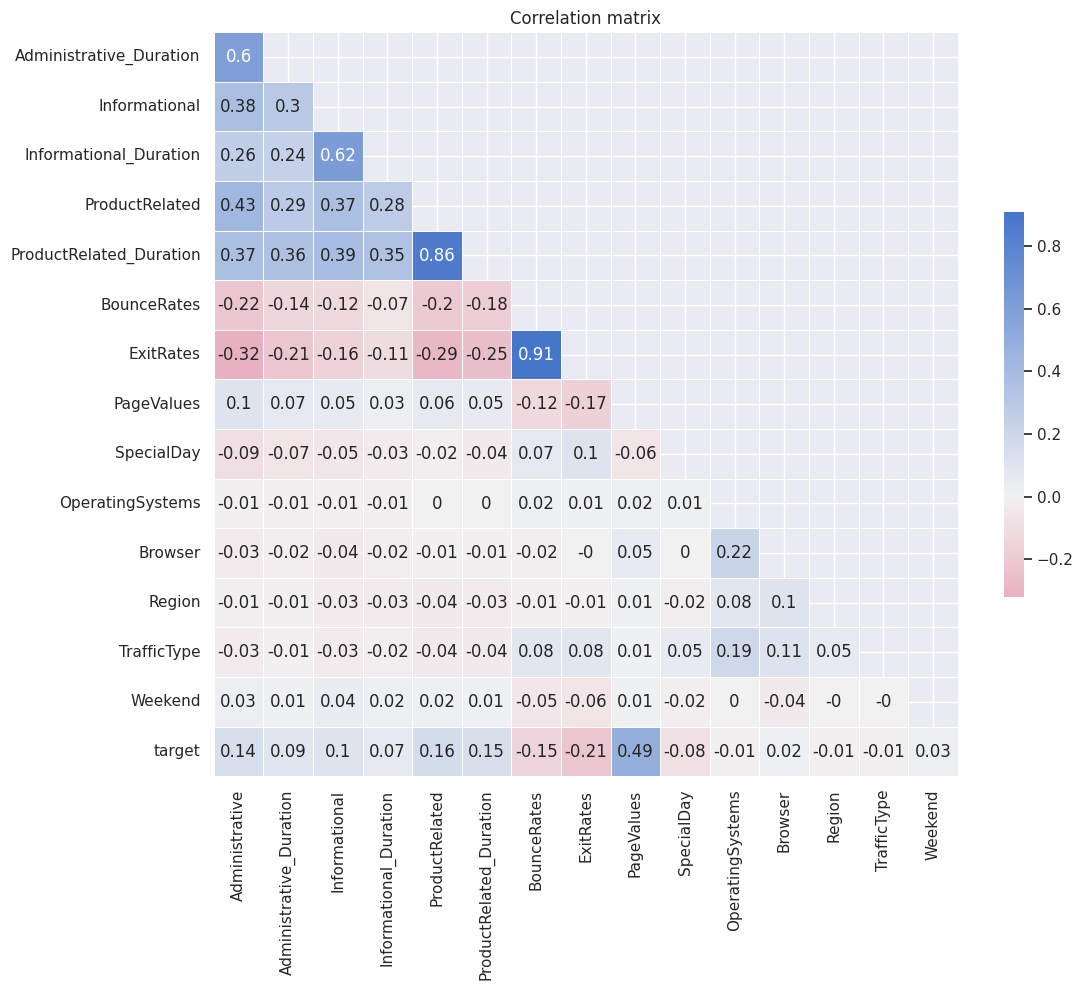

In [270]:
#Correlation Matrix
import matplotlib.pyplot as plt
import seaborn as sns
df_corr_matrix = df[df.select_dtypes(include=['number', 'bool']).columns].corr().round(2)


plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(df_corr_matrix))
cmap = sns.diverging_palette(0, 255, sep=1, n=256)
ax = sns.heatmap(df_corr_matrix, mask=mask, annot=True, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xlim(0,len(df_corr_matrix)-1)
ax.set_ylim(len(df_corr_matrix),1)
#ax.collections[0].set_clim(-1,1)
plt.title('Correlation matrix')
plt.show()

array([[<Axes: title={'center': 'Administrative'}>,
        <Axes: title={'center': 'Administrative_Duration'}>,
        <Axes: title={'center': 'Informational'}>,
        <Axes: title={'center': 'Informational_Duration'}>],
       [<Axes: title={'center': 'ProductRelated'}>,
        <Axes: title={'center': 'ProductRelated_Duration'}>,
        <Axes: title={'center': 'BounceRates'}>,
        <Axes: title={'center': 'ExitRates'}>],
       [<Axes: title={'center': 'PageValues'}>,
        <Axes: title={'center': 'SpecialDay'}>,
        <Axes: title={'center': 'OperatingSystems'}>,
        <Axes: title={'center': 'Browser'}>],
       [<Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'TrafficType'}>, <Axes: >, <Axes: >]],
      dtype=object)

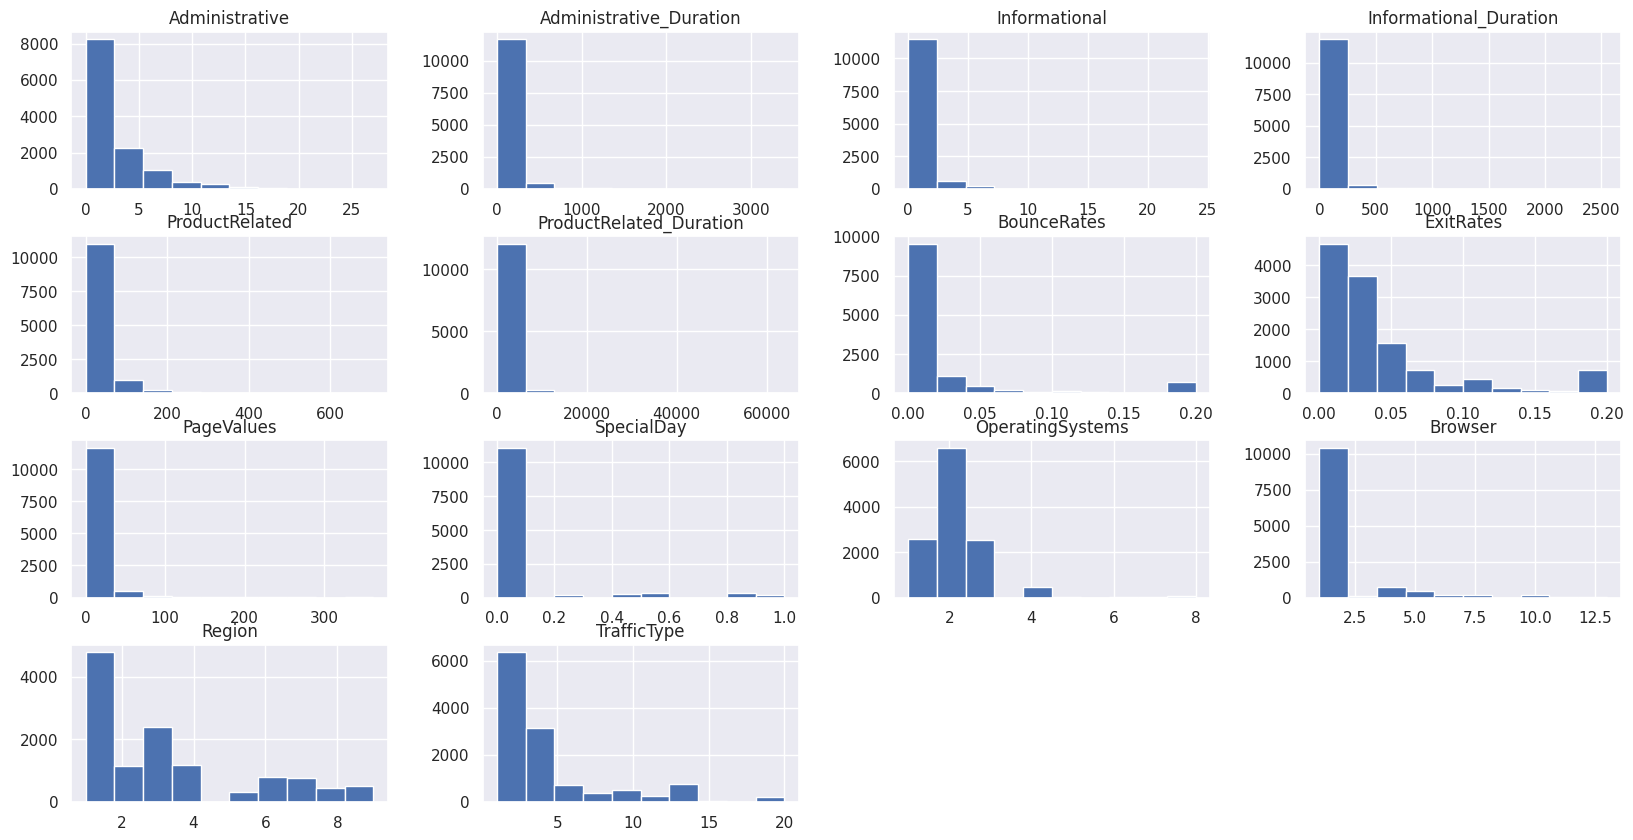

In [271]:
#Histograms
df.hist(figsize=[20,10])

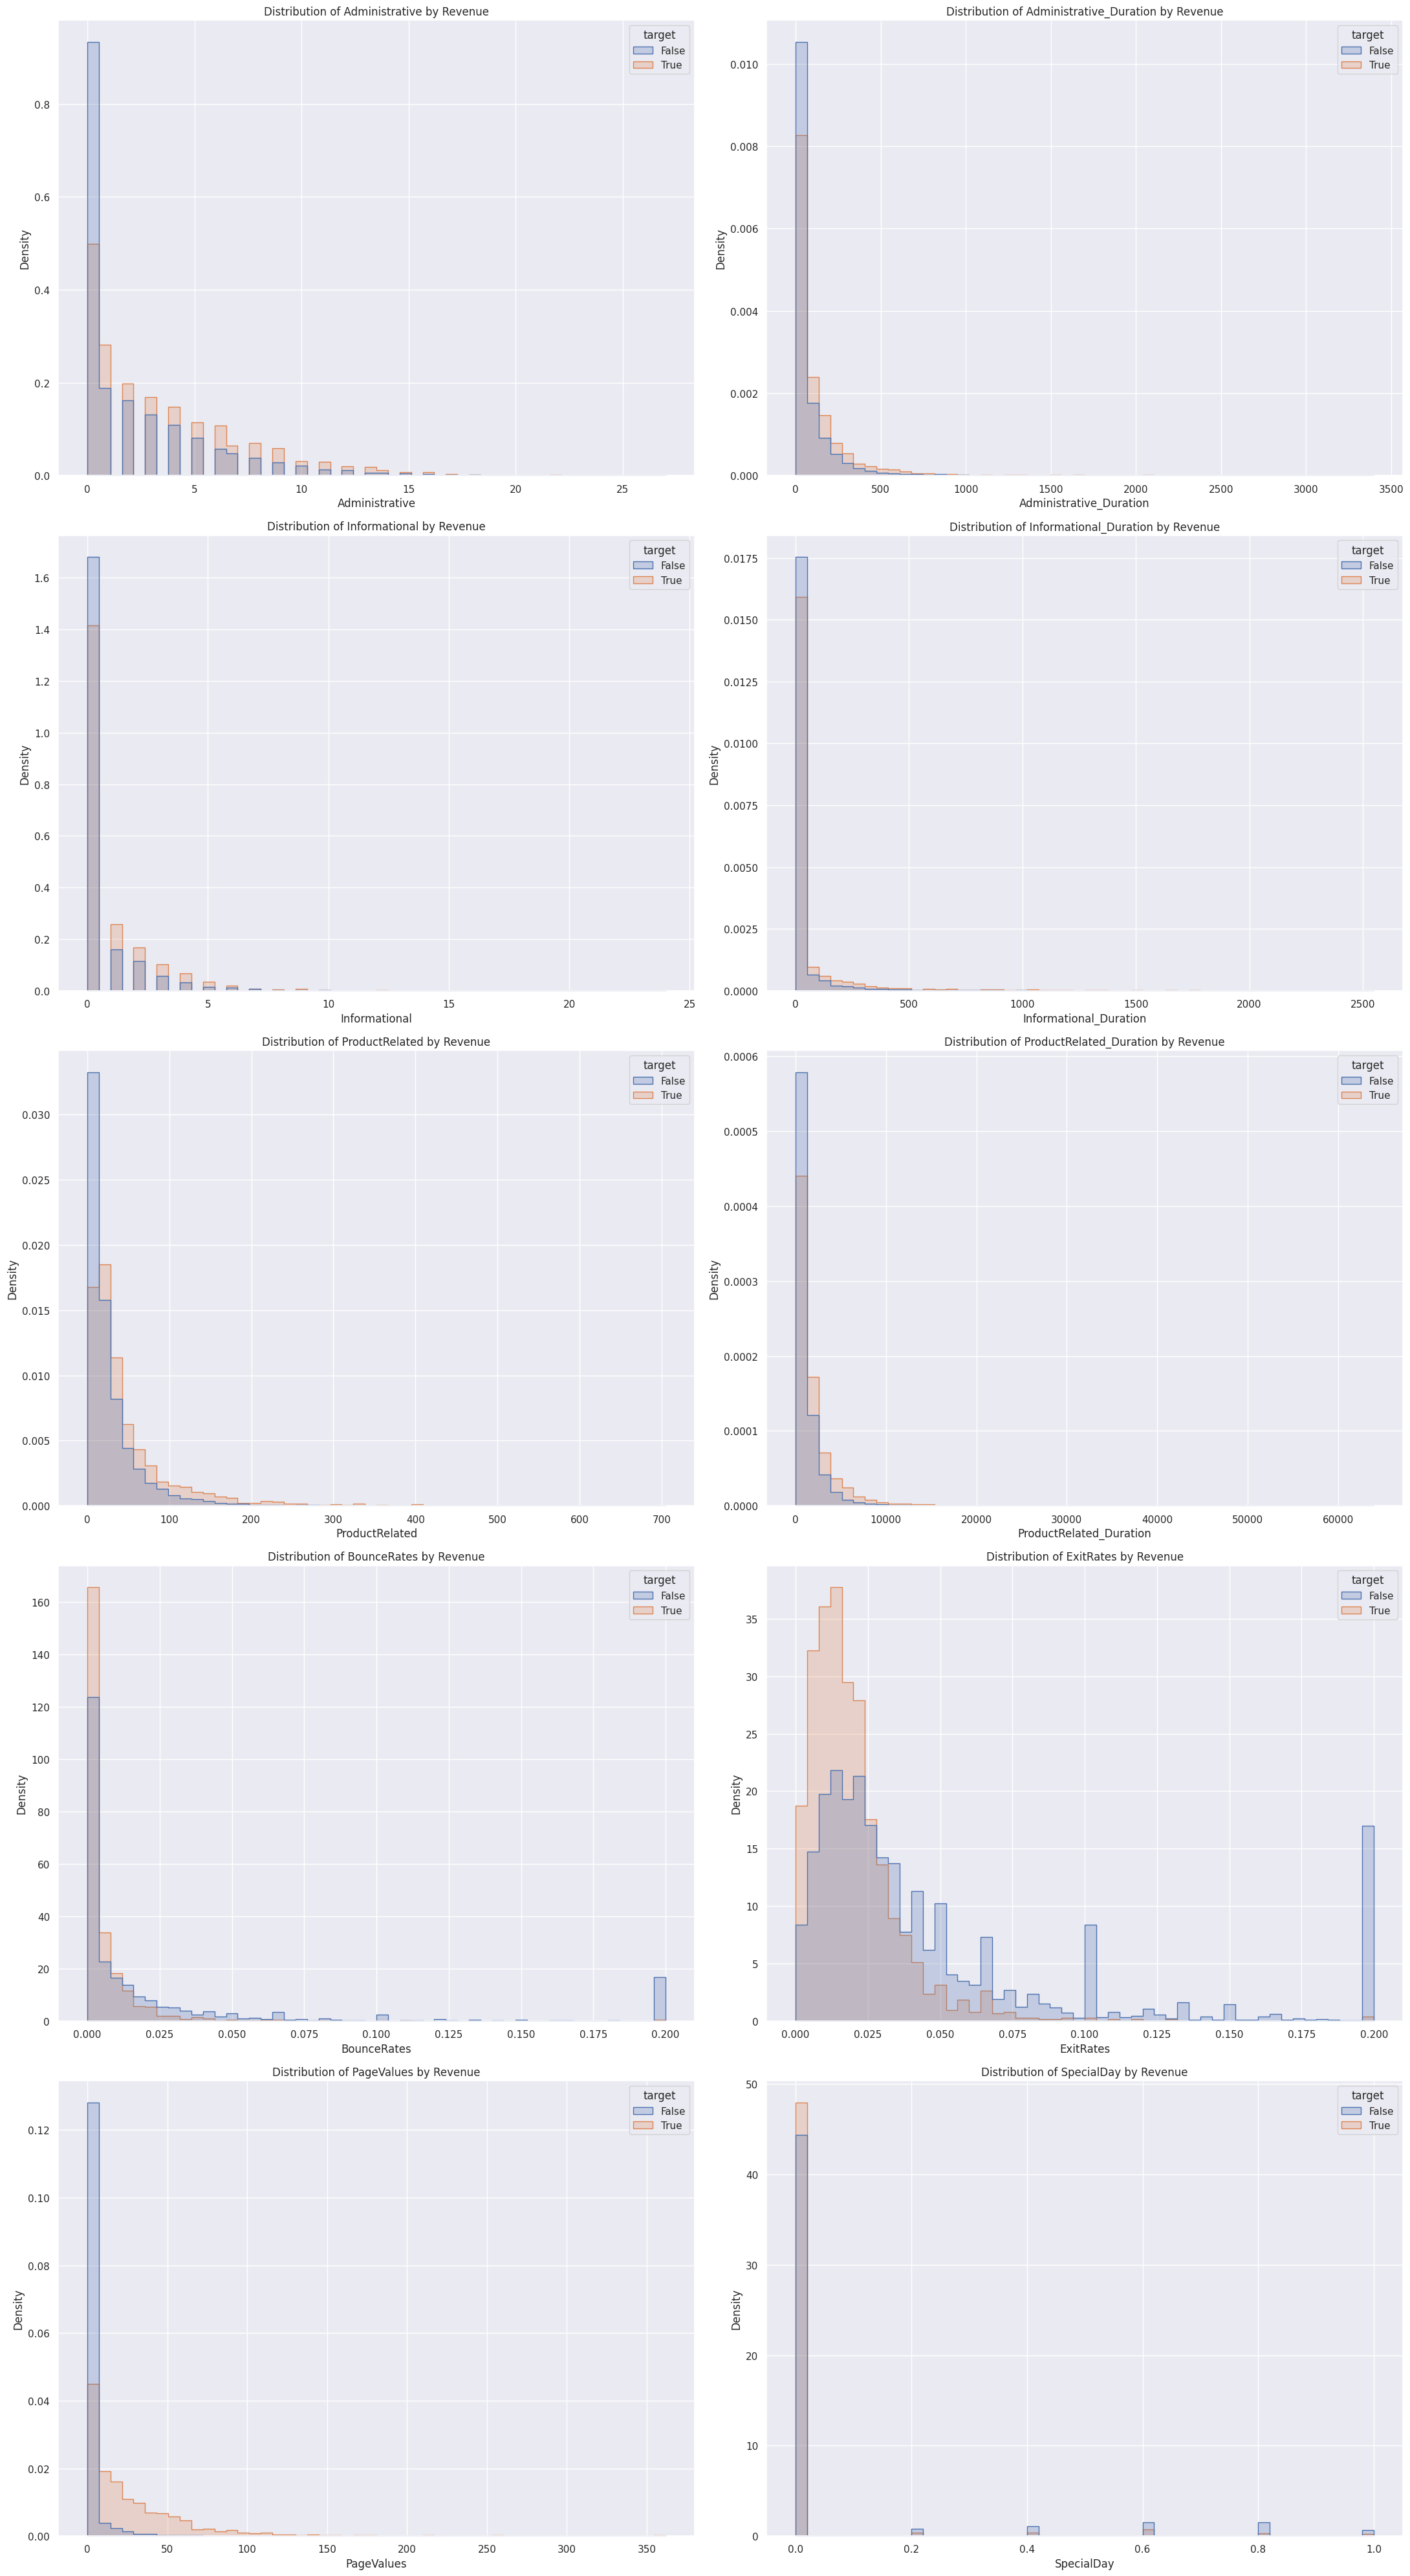

In [272]:
#Histograms of "purchase" vs "no purchase" between each feature
sns.set_theme()
# Set up the matplotlib figure
fig, axes = plt.subplots(5, 2, figsize=(22, 40))

# Plot histograms for numerical features based on the value of the target variable 'Revenue'
for col, ax in zip(df.select_dtypes(include='number').columns, axes.flatten()):
    sns.histplot(data=df, x=col, hue="target", element="step", stat="density", common_norm=False, bins=50, ax=ax)
    ax.set_title(f'Distribution of {col} by Revenue')

plt.tight_layout()
plt.show()

# PREPROCESSING

In [273]:
#Filter warnings
import warnings
warnings.filterwarnings('ignore')

In [274]:
#Check missing values and variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [275]:
#Check shape
df.shape

(12330, 18)

In [276]:
#Check total missing values
df.duplicated().sum()

125

In [277]:
#Since it is only 125/12205, we decided to drop the duplicate rows
df.drop_duplicates(inplace=True, keep='first')
df.duplicated().sum()

0

In [278]:
#Check new shape
df.shape

(12205, 18)

**Categorize Variables into Numeric, 1Hot or Ordinal**

Numeric: Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay

1Hot: OperatingSystems, Browser, Region, TrafficType, VisitorType, Month

Bool: Weekend, target

In [279]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'target'],
      dtype='object')

- ‘Administrative’: A type of page visited by a visitor in the Administrative category
- ‘Administrative_Duration’: The duration of which the visitor visited an “Administrative’ page type
- ‘Informational’: A type of page visited by a visitor in the Informational category
- ‘Informational_Duration’: The duration of which the visitor visited an “Informational” page type
- ‘ProductRelated’: A type of page visited by a visitor in related to Products on the website
- ‘ProductRelated_Duration’: The duration of which the visitor visited a Product Related site on the website
- ‘BounceRates’: percentage of visitors who land on the site and leave without interacting further (single page session)
- ‘ExitRates’: percentage of sessions that end with a user exiting from the site from a specific page (sessions ended on a particular page)
- ‘PageValues’: Average value of the page averaged over the value of the target page
- ‘SpecialDay’: The closeness of the browsing date to special days/holidays (Mother’s Day, Valentine’s Day)
- ‘Month’: The month the visitor viewed a page
- ‘OperatingSystems’: The operating system that the visitor was on when viewing the page
- ‘Browser’: The browser that the visitor was using to view the page
- ‘Region’: The region in which the visitor is located in
- ‘TrafficType’: The type of traffic the visitor is categorized
- ‘VisitorType’: The type of visitor the visitor is categorized to ( Returning Visitor, new visitor, Other)
- ‘Weekend’: Whether or not the visitor visited the page on a weekend
- ‘Revenue’: Whether or not the visitor completed a purchase (Target variable)



In [280]:
#Convert boolean values to integers
df['target'] = df['target'].apply(lambda x: 1 if  x==True else 0)
df['Weekend'] = df['Weekend'].apply(lambda x: 1 if  x==True else 0)

In [281]:
#Check to see if successfully dropped
df.target, df.Weekend

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 12325    0
 12326    0
 12327    0
 12328    0
 12329    0
 Name: target, Length: 12205, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        1
         ..
 12325    1
 12326    1
 12327    1
 12328    0
 12329    1
 Name: Weekend, Length: 12205, dtype: int64)

In [282]:
#Define variable categories in code:

shoppers_num=['Administrative', 'Administrative_Duration', 'Informational', \
              'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',\
 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']


shoppers_cat=['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Month']

In [283]:
#Put all preprocessing steps in a ColumnTransformer
#Drop remaining columns
preprocessing = ColumnTransformer([
    ('scaler', StandardScaler(), shoppers_num),
    ('encoder', OneHotEncoder(handle_unknown = 'ignore',sparse_output=False), \
     shoppers_cat)
],
                                  remainder='drop'
)

preprocessing

ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                 ['Administrative', 'Administrative_Duration',
                                  'Informational', 'Informational_Duration',
                                  'ProductRelated', 'ProductRelated_Duration',
                                  'BounceRates', 'ExitRates', 'PageValues',
                                  'SpecialDay']),
                                ('encoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['OperatingSystems', 'Browser', 'Region',
                                  'TrafficType', 'VisitorType', 'Month'])])

In [284]:
#Split data with 30% test, 70% train
X_train, X_test, y_train, y_test = train_test_split(X, y ,train_size=.7, stratify = y, random_state = 100)

In order to run these processes in parallel, we decided to use a ColumnTransformer. Since we only had 17 features (18 including target), we manually decided if they were categorical, numerical, or other (boolean in our case). We then scaled the numerical features, OneHotEncoded the categorical features, and converted booleans to integers so that all models could handle our data. In every model, we chose to use the same preprocessing so we could evaluate the validiaty of each model against each other. We did not drop any features - only duplicated rows.

# MODELS

##Logistic Regression

In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
#Create Logistic regression
log_reg = LogisticRegression(penalty = 'l1', random_state = 42, C = 0.1, solver = 'saga')

#Put it in a pipeline with preprocessing
pipeline_logreg = Pipeline([
    ('preprocess', preprocessing),
    ('log_reg', log_reg)
])

#Fit it to X_train, y_train data
pipeline_logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues',
                                                   'SpecialDay']),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'VisitorType',
                                                   'Month'])])),
                ('log_reg',
                 LogisticRegression(C=0.1, penalty='l1', random_state=42,
                                    solver='saga'))])

###GridSearch for Best C

In [286]:
#Perform a GridSearch for best C parameter
from sklearn.model_selection import StratifiedKFold
param_grid = {
    'log_reg__C': [0.01, 0.1, 1, 10]
}
kf = StratifiedKFold(n_splits = 5, random_state = 100, shuffle = True)
grid_search = GridSearchCV(pipeline_logreg, param_grid, cv=kf)
grid_search.fit(X_train, y_train)
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_log_reg__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.449379,0.174410,0.043842,0.018833,0.01,{'log_reg__C': 0.01},0.879560,0.882387,0.873117,0.873696,0.880649,0.877882,0.003768,4
1,3.138399,0.814042,0.036479,0.014111,0.1,{'log_reg__C': 0.1},0.885350,0.886443,0.878911,0.873117,0.883546,0.881473,0.004907,1
2,2.126866,0.653476,0.027395,0.018443,1,{'log_reg__C': 1},0.884771,0.882966,0.880649,0.874855,0.882966,0.881242,0.003451,2
3,1.527345,0.415716,0.026205,0.022300,10,{'log_reg__C': 10},0.883613,0.882387,0.879490,0.873696,0.882966,0.880431,0.003650,3


We are already using the best C!

###Model Evaluation (score, auc_score, ROC curve, confusion matrix)

In [287]:
#Regular score
pipeline_logreg.score(X_test,y_test)

0.8851040821843742

In [288]:
#AUC score
y_proba_logreg = pipeline_logreg.predict_proba(X_test)
roc_auc_score(y_test, y_proba_logreg[:,1])

0.8975687727686449

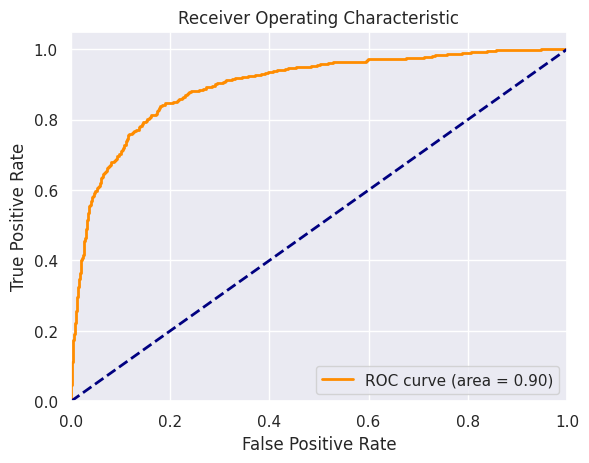

In [289]:
# Calculate ROC Curve and AUC
from sklearn.metrics import accuracy_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba_logreg[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [290]:
#Confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
y_pred_logreg = pipeline_logreg.predict(X_test)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)
print(cm_logreg), print(report_logreg)

[[3070   57]
 [ 368  204]]
              precision    recall  f1-score   support

       False       0.89      0.98      0.94      3127
        True       0.78      0.36      0.49       572

    accuracy                           0.89      3699
   macro avg       0.84      0.67      0.71      3699
weighted avg       0.88      0.89      0.87      3699



(None, None)

This model is scoring well in precision, but poorly in recall and f1 scores (when looking at the "True" row). This indicates to us that when the model predicts a positive instance, it is more likely to be correct. However, it is not good at identifying the positive instances out of all actual positive instances.

###Problem, Discussion & Solution

*Problem:* At this point we stopped to view some issues with our scores. We noticed that while the precision score was relatively good, our recall score was relatively poor. After some investigation, we realized this is because we have an imbalanced dataset that is about 84.5% "no purchase" and 15.5% "purchase". This means that most of the time the model will predict "no purchase" anyways, so when it does predict a "purchase" class it is probably overfitted and predicting it accurately. However, it misses over half the time to even identify the positive class. The mix of both these factors yielded an f1 score that was not great.

It is important to look at the AUC score very carefully here. Although it tells us that our model is "good", this is not the full picture. It is just right more of the time as it is predicting the majority class ("no purchase") most of the time anyway which doesn't give us any insight as to what causes a customer to fall into the minority class ("purchase").

Since, in this case, the minority class is the one that brings in revenue, we chose to classify this as an issue despite the good accuracy and AUC scores. The whole purpose of the project is to see what causes customers to make a purchase, so if our model can't predict which customers make a purchase, we cannot draw any insights from this.

*Discussion:* To solve this, we learned about SMOTE and Undersampling. SMOTE is a common industry standard for imbalanced datasets such as ours and performs a method called oversampling. In SMOTE, copies of the minority class ("purchase") will be created until the data is about a 50/50 split. After some research on SMOTE we learned about its sister method - undersampling. In Undersampling, samples of the majority class ("no purchase") are used instead of the full dataset. In other words, the undersampler will delete instances of the majority class to balance out the dataset. For the purpose of this assignment we have referred to the two as SMOTE and Undersampling. The actual methods we used are:

- SMOTENC(): Can handle numerical and categorical information. For numerical-only data, use SMOTE. This class can only take in both numerical and categorical, it cannot handle categorical-only data.
  
  More info: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html
- RandomUnderSampler(): Class to perform undersampling

  More info: https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html

Note: Both these methods are from the imbalanced-learn library

*Solution:* Re-sample the X_train and y_train data using SMOTENC() and RandomUnderSampler(). For all later models we tried, we will be fitting it to both over- and undersampled data to see which performs better.

In [291]:
# We now need to find the column number for each of the following categorical features:
# 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Month'
# Used ChatGPT prompt: how to check which column number each column name is in a df (with slightly modified code)

# Get column numbers for each column name
column_numbers = {col: df.columns.get_loc(col) for col in df.columns}

# Print the result
print("\nColumn numbers for each column name:")
for col, col_num in column_numbers.items():
    print(f"{col}: {col_num}")


Column numbers for each column name:
Administrative: 0
Administrative_Duration: 1
Informational: 2
Informational_Duration: 3
ProductRelated: 4
ProductRelated_Duration: 5
BounceRates: 6
ExitRates: 7
PageValues: 8
SpecialDay: 9
Month: 10
OperatingSystems: 11
Browser: 12
Region: 13
TrafficType: 14
VisitorType: 15
Weekend: 16
target: 17


We needed the column **number** as inputs for SMOTE so we printed out the names of each column and their respective column number.

The categorical features correspond to columns: 10, 11, 12, 13, 14, 15, 16

In [292]:
from imblearn.over_sampling import SMOTENC

#Create smote class and input the categorical column numbers
smote = SMOTENC(random_state = 42, k_neighbors = 5, categorical_features=[10, 11, 12, 13, 14, 15, 16])

#Resample X_train and y_train via oversampling and store in new variable names
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [293]:
from imblearn.under_sampling import RandomUnderSampler

#Create undersampler class
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

#Resample X_train and y_train via undersampling and store in new variable names
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

Let's see if it worked!

In [294]:
print("X_train original shape: ", X_train.shape)
print("X_train_smote shape", X_train_smote.shape)
print("X_train_under shape: ", X_train_under.shape)

print("\ny_train original shape: ", y_train.shape)
print("y_train_smote shape", y_train_smote.shape)
print("y_train_under shape: ", y_train_under.shape)

X_train original shape:  (8631, 17)
X_train_smote shape (14590, 17)
X_train_under shape:  (2672, 17)

y_train original shape:  (8631, 1)
y_train_smote shape (14590, 1)
y_train_under shape:  (2672, 1)


Let's try running Logistic Regression again with over- and undersampled data.

##Logistic Regression With SMOTE

In [295]:
#Create a new pipeline with smote, using the same logistic regression hyperparameters
pipeline_logreg_smote = Pipeline([
    ('preprocess', preprocessing),
    ('log_reg', log_reg)
])

#Fit it to the resampled (smote) data
pipeline_logreg_smote.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues',
                                                   'SpecialDay']),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'VisitorType',
                                                   'Month'])])),
                ('log_reg',
                 LogisticRegression(C=0.1, penalty='l1', random_state=42,
                                    solver='saga'))])

###Model Evaluation (score, auc_score, ROC curve, confusion matrix)

In [296]:
#Regular score
pipeline_logreg_smote.score(X_test,y_test)

0.8629359286293593

In [297]:
#AUC score
y_proba_logreg_smote = pipeline_logreg_smote.predict_proba(X_test)
roc_auc_score(y_test, y_proba_logreg_smote[:,1])

0.8796054441241521

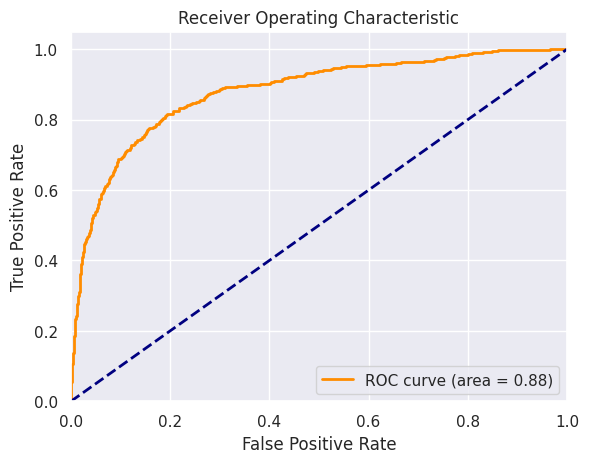

In [298]:
# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_logreg_smote[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [299]:
#Confusion matrix and classification report
y_pred_logreg_smote = pipeline_logreg_smote.predict(X_test)
cm_logreg_smote = confusion_matrix(y_test, y_pred_logreg_smote)
report_logreg_smote = classification_report(y_test, y_pred_logreg_smote)
print(cm_logreg_smote), print(report_logreg_smote)

[[2791  336]
 [ 171  401]]
              precision    recall  f1-score   support

       False       0.94      0.89      0.92      3127
        True       0.54      0.70      0.61       572

    accuracy                           0.86      3699
   macro avg       0.74      0.80      0.76      3699
weighted avg       0.88      0.86      0.87      3699



(None, None)

Here, we noticed that while the AUC score went going down by one percent, our model is now finding the actual positives out of the dataset rather than sparsely predicting the amount of Trues and getting those correct. Our precision did also drop, but it dropped by 24 percentage points while recall went up by 36 percentage points. Furthermore, if we look at the f1 score comparison which aggregates the two, we can see that the smote model scored higher (61% f1 in smote vs 49% f1 in regular).

##Logistic Regression with Undersampling

In [300]:
#New pipeline with same logistic regression as before
pipeline_logreg_under = Pipeline([
    ('preprocess', preprocessing),
    ('log_reg', log_reg)
])

#Fit to undersampled data
pipeline_logreg_under.fit(X_train_under, y_train_under)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues',
                                                   'SpecialDay']),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'VisitorType',
                                                   'Month'])])),
                ('log_reg',
                 LogisticRegression(C=0.1, penalty='l1', random_state=42,
                                    solver='saga'))])

###Model Evaluation (score, auc_score, ROC curve, confusion matrix)

In [301]:
#Regular score
pipeline_logreg_under.score(X_test, y_test)

0.8637469586374696

In [302]:
#AUC score
y_proba_logreg_under = pipeline_logreg_under.predict_proba(X_test)
roc_auc_score(y_test, y_proba_logreg_under[:,1])

0.9042858724262625

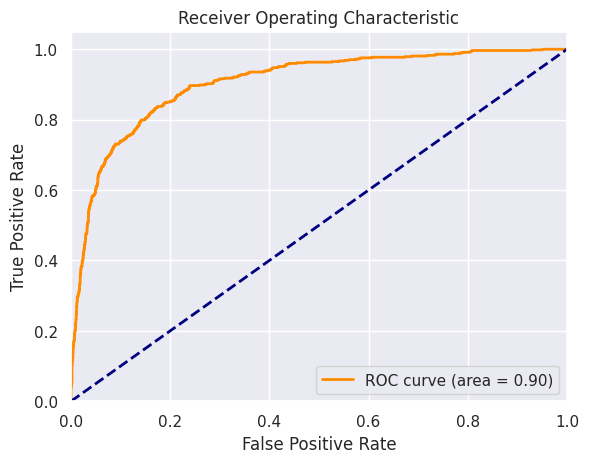

In [303]:
# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_logreg_under[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [304]:
#Confusion matrix and classification report
y_pred_logreg_under = pipeline_logreg_under.predict(X_test)
cm_logreg_under = confusion_matrix(y_test, y_pred_logreg_under)
report_logreg_under = classification_report(y_test, y_pred_logreg_under)
print(cm_logreg_under), print(report_logreg_under)

[[2764  363]
 [ 141  431]]
              precision    recall  f1-score   support

       False       0.95      0.88      0.92      3127
        True       0.54      0.75      0.63       572

    accuracy                           0.86      3699
   macro avg       0.75      0.82      0.77      3699
weighted avg       0.89      0.86      0.87      3699



(None, None)

Here, we noticed that the model performed even better overall. The f1 score was higher than both the regular model (49%) and the smote model (61%) at 63%. Let's break it down.

The precision score was exactly the same as the smote but much lower than the regular model (54% vs 78% in regular). However, the recall score outperformed both models at 75%. For referece, the recall score for smote was 70% and for regular was 36%.

##Bagging with Logistic Regression (SMOTE)

In [305]:
from sklearn.ensemble import BaggingClassifier
baggingclf = BaggingClassifier(LogisticRegression(), n_estimators=10, random_state=42)

pipeline_bagging_logreg_smote = Pipeline([
    ('preprocess', preprocessing),
    ('baggingclf', baggingclf)
])

pipeline_bagging_logreg_smote.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues',
                                                   'SpecialDay']),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'VisitorType',
                                                   'Month'])])),
                ('baggingclf',
                 BaggingClassifier(estimator=LogisticRegression(),
                                   random_state=42))])

###Model Evaluation (score, auc_score, ROC curve, confusion matrix)

In [306]:
pipeline_bagging_logreg_smote.score(X_test, y_test)

0.8591511219248446

In [307]:
y_proba_baggingclf_logreg_smote = pipeline_bagging_logreg_smote.predict_proba(X_test)
roc_auc_score(y_test, y_proba_baggingclf_logreg_smote[:,1])

0.8727427034110756

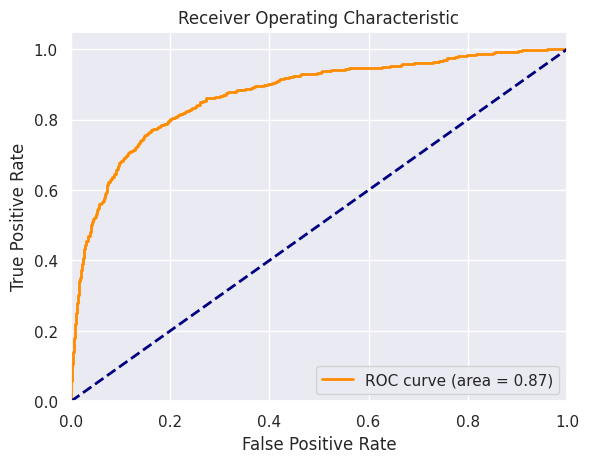

In [308]:
# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_baggingclf_logreg_smote[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [309]:
y_pred_baggingclf_smote = pipeline_bagging_logreg_smote.predict(X_test)
cm_baggingclf_logreg_smote = confusion_matrix(y_test, y_pred_baggingclf_smote)
report_baggingclf_logreg_smote = classification_report(y_test, y_pred_baggingclf_smote)
print(cm_baggingclf_logreg_smote), print(report_baggingclf_logreg_smote)

[[2780  347]
 [ 174  398]]
              precision    recall  f1-score   support

       False       0.94      0.89      0.91      3127
        True       0.53      0.70      0.60       572

    accuracy                           0.86      3699
   macro avg       0.74      0.79      0.76      3699
weighted avg       0.88      0.86      0.87      3699



(None, None)

It appears that bagging with logistic regression (smote) slightly underperformed compared to regular logistic regression (smote). Overall, the f1 score was a percentage point lower as the precision was a percentage point lower. It is a marginal difference, but may better reflect the model as it takes the average of several logistic regressions. Our logistic regression already performed fairly well on its own.

##Bagging with Logistic Regression (Undersampling)

In [310]:
baggingclf = BaggingClassifier(LogisticRegression(), n_estimators=10, random_state=42)

pipeline_bagging_logreg_under = Pipeline([
    ('preprocess', preprocessing),
    ('baggingclf', baggingclf)
])

pipeline_bagging_logreg_under.fit(X_train_under, y_train_under)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues',
                                                   'SpecialDay']),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'VisitorType',
                                                   'Month'])])),
                ('baggingclf',
                 BaggingClassifier(estimator=LogisticRegression(),
                                   random_state=42))])

###Model Evaluation (score, auc_score, ROC curve, confusion matrix)

In [311]:
#Regular score
pipeline_bagging_logreg_under.score(X_test, y_test)

0.8488780751554474

In [312]:
#AUC score
y_proba_bagging_logreg_under = pipeline_bagging_logreg_under.predict_proba(X_test)
roc_auc_score(y_test, y_proba_bagging_logreg_under[:,1])

0.8992527300010511

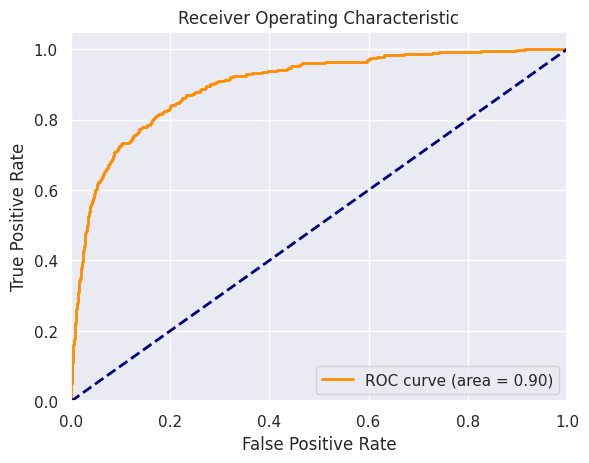

In [313]:
# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_bagging_logreg_under[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [314]:
#Confusion matrix and classification report
y_pred_bagging_logreg_under = pipeline_bagging_logreg_under.predict(X_test)
cm_bagging_logreg_under = confusion_matrix(y_test, y_pred_bagging_logreg_under)
report_bagging_logreg_under = classification_report(y_test, y_pred_bagging_logreg_under)
print(cm_bagging_logreg_under), print(report_bagging_logreg_under)

[[2698  429]
 [ 130  442]]
              precision    recall  f1-score   support

       False       0.95      0.86      0.91      3127
        True       0.51      0.77      0.61       572

    accuracy                           0.85      3699
   macro avg       0.73      0.82      0.76      3699
weighted avg       0.88      0.85      0.86      3699



(None, None)

We see a relatively similar thing happening in bagging with logistic regression vs a regular logistic regression when comparing the performance of over- and undersampled data.

It seems that when we use undersampled data, the recall score goes up while precision goes down (in this case) or stays the same (in regular logistic regression). Again, the f1 score went up with undersampled data. In our regular logistic regression, when we used undersampled data our f1 score also increased.

##Decision Tree with SMOTE

In [315]:
#Create a decision tree clf
ctree = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=50, random_state=100)

#Put it in a pipeline with preprocessing
pipeline_ctree_smote = Pipeline([
    ('preprocess', preprocessing),
    ('c_tree', ctree)
])

#Fit decision tree to oversampled data
pipeline_ctree_smote.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues',
                                                   'SpecialDay']),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'VisitorType',
                                                   'Month'])])),
                ('c_tree',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=50,
                                        random_state=100))])

###Model Evaluation (score, auc_score, ROC curve, confusion matrix)

In [316]:
#Regular score
pipeline_ctree_smote.score(X_test, y_test)

0.8796972154636388

In [317]:
#AUC score
y_proba_ctree_smote = pipeline_ctree_smote.predict_proba(X_test)
roc_auc_score(y_test, y_proba_ctree_smote[:,1])

0.9222740802529736

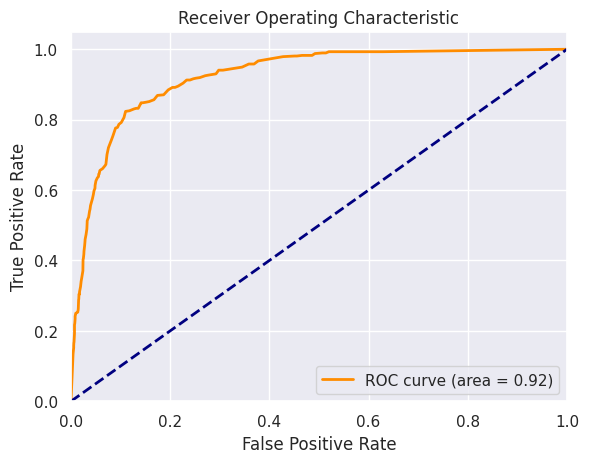

In [318]:
# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_ctree_smote[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [319]:
#Confusion matrix and classification report
y_pred_ctree_smote = pipeline_ctree_smote.predict(X_test)
cm_ctree_smote = confusion_matrix(y_test, y_pred_ctree_smote)
report_ctree_smote = classification_report(y_test, y_pred_ctree_smote)
print(cm_ctree_smote), print(report_ctree_smote)

[[2793  334]
 [ 111  461]]
              precision    recall  f1-score   support

       False       0.96      0.89      0.93      3127
        True       0.58      0.81      0.67       572

    accuracy                           0.88      3699
   macro avg       0.77      0.85      0.80      3699
weighted avg       0.90      0.88      0.89      3699



(None, None)

This seems to be our best model so far! Precision, recall and f1 are all the highest they've been, not including the regular logistic regression on non-oversampled or non-undersampled data.

##Decision Tree with Undersampling

In [320]:
#Create a decision tree clf
ctree = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=50, random_state=100)

#Put it in a pipeline with preprocessing
pipeline_ctree_under = Pipeline([
    ('preprocess', preprocessing),
    ('c_tree', ctree)
])

#Fit the pipeline to undersampled data
pipeline_ctree_under.fit(X_train_under, y_train_under)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues',
                                                   'SpecialDay']),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'VisitorType',
                                                   'Month'])])),
                ('c_tree',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=50,
                                        random_state=100))])

###Model Evaluation (score, auc_score, ROC curve, confusion matrix)

In [321]:
#Regular score
pipeline_ctree_under.score(X_test, y_test)

0.8588807785888077

In [322]:
#AUC score
y_proba_ctree_under = pipeline_ctree_under.predict_proba(X_test)
roc_auc_score(y_test, y_proba_ctree_under[:,1])

0.9211329923674023

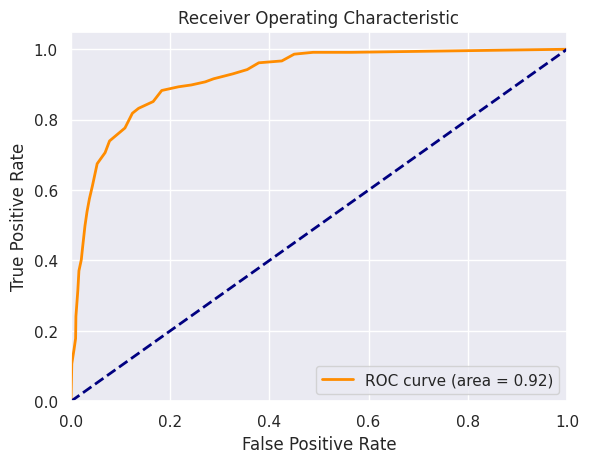

In [323]:
# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_ctree_under[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [324]:
#Confusion matrix and classification report
y_pred_ctree_under = pipeline_ctree_under.predict(X_test)
cm_ctree_under = confusion_matrix(y_test, y_pred_ctree_under)
report_ctree_under = classification_report(y_test, y_pred_ctree_under)
print(cm_ctree_under), print(report_ctree_under)

[[2701  426]
 [  96  476]]
              precision    recall  f1-score   support

       False       0.97      0.86      0.91      3127
        True       0.53      0.83      0.65       572

    accuracy                           0.86      3699
   macro avg       0.75      0.85      0.78      3699
weighted avg       0.90      0.86      0.87      3699



(None, None)

The score here followed the same general trends as the other two models. With undersampling, the precision went down but the recall score went up. However, this time the f1 score went down instead of up. This was because the precision went down by 5 percent, while the recall went up by only 2 percent. Overall, the changes were negative instead of positive to the model, creating a lower f1 score.

##Random Forest with SMOTE

In [325]:
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest clf
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

#Put it in a pipeline with preprocessing
pipeline_rfc_smote = Pipeline([
    ('preprocess', preprocessing),
    ('RandomForestClassifier', rfc)
])

#Fit it to oversampled data
pipeline_rfc_smote.fit(X_train_smote,y_train_smote)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues',
                                                   'SpecialDay']),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'VisitorType',
                                                   'Month'])])),
                ('RandomForestClassifier',
                 RandomForestClassifier(random_state=42))])

###Model Evaluation (score, auc_score, ROC curve, confusion matrix)

In [326]:
#Regular score
pipeline_rfc_smote.score(X_test,y_test)

0.8929440389294404

In [327]:
#AUC score
y_proba_rfc_smote = pipeline_rfc_smote.predict_proba(X_test)
roc_auc_score(y_test,y_proba_rfc_smote[:,1])

0.9225354514369546

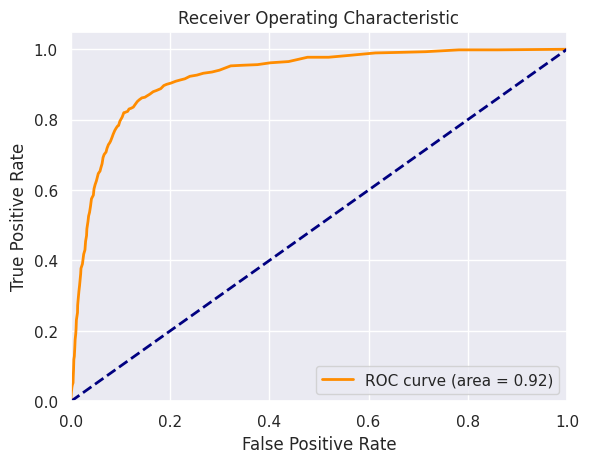

In [328]:
# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rfc_smote[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [329]:
#Confusion matrix and classification report
y_pred_rfc_smote = pipeline_rfc_smote.predict(X_test)
cm_rfc_smote = confusion_matrix(y_test, y_pred_rfc_smote)
report_rfc_smote= classification_report(y_test, y_pred_rfc_smote)
print(cm_rfc_smote), print(report_rfc_smote)

[[2883  244]
 [ 152  420]]
              precision    recall  f1-score   support

       False       0.95      0.92      0.94      3127
        True       0.63      0.73      0.68       572

    accuracy                           0.89      3699
   macro avg       0.79      0.83      0.81      3699
weighted avg       0.90      0.89      0.90      3699



(None, None)

Here, we noticed that the f1 score was the highest we've seen so far! Furthermore, the precision and recall are fairly evenly balanced - whereas in other models one is usually really high while the other is very low. Compared to the decision tree with SMOTE, we see that precision is higher while recall is lower. However, the f1 score went up indicating that the gain in precision is higher than the loss in recall, making this a better model overall.

###Feature importance on Random Forest

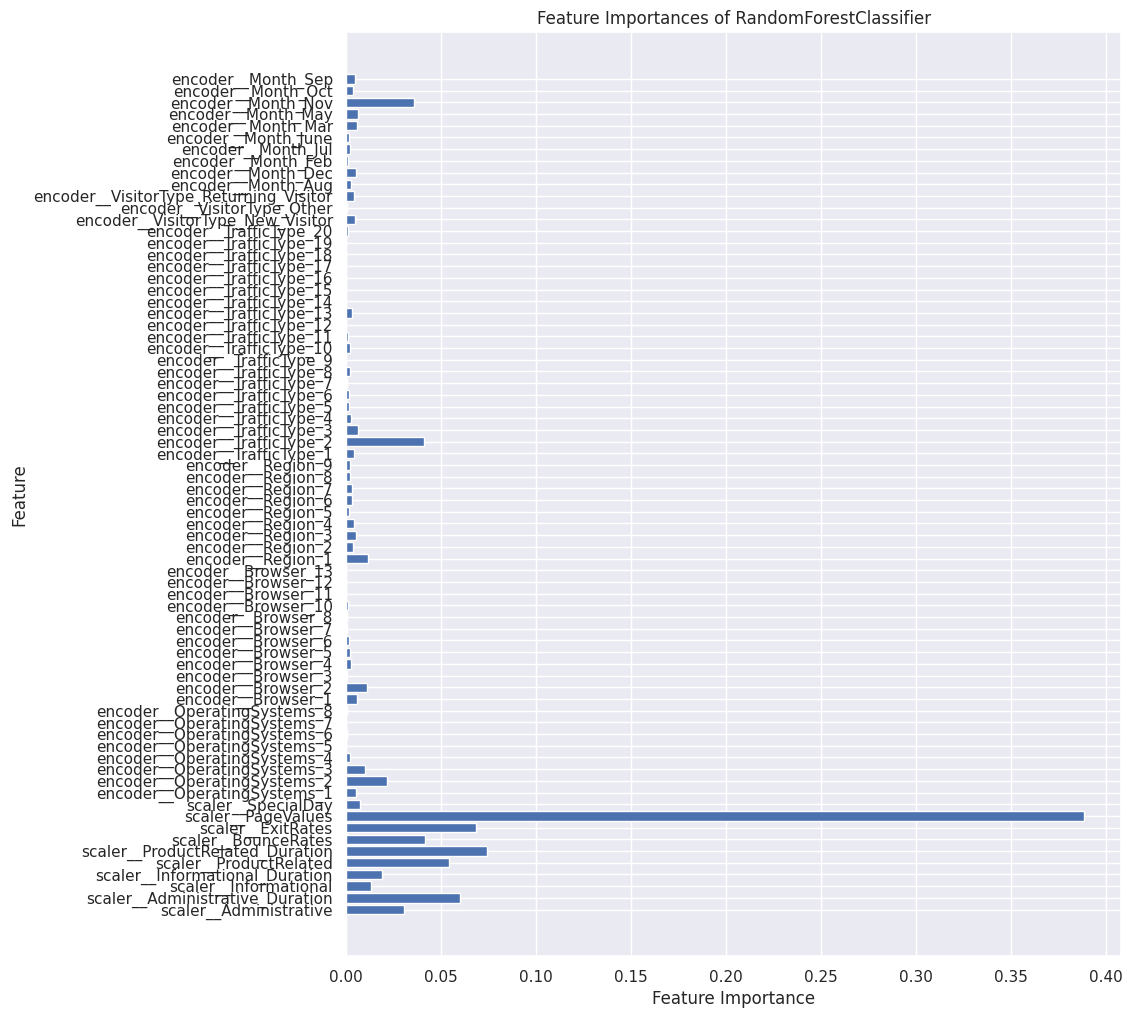

In [330]:
import matplotlib.pyplot as plt

# Retrieve feature importances
importances = pipeline_rfc_smote.named_steps['RandomForestClassifier'].feature_importances_

# Retrieve feature names from previous preprocessing steps
feature_names = pipeline_rfc_smote.named_steps['preprocess'].get_feature_names_out()

# Plot feature importances
plt.figure(figsize=(10, 12))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(np.arange(len(importances)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of RandomForestClassifier')
plt.show()

Since there are several values, we decided to aggregate them and view based on the values before we encoded them.

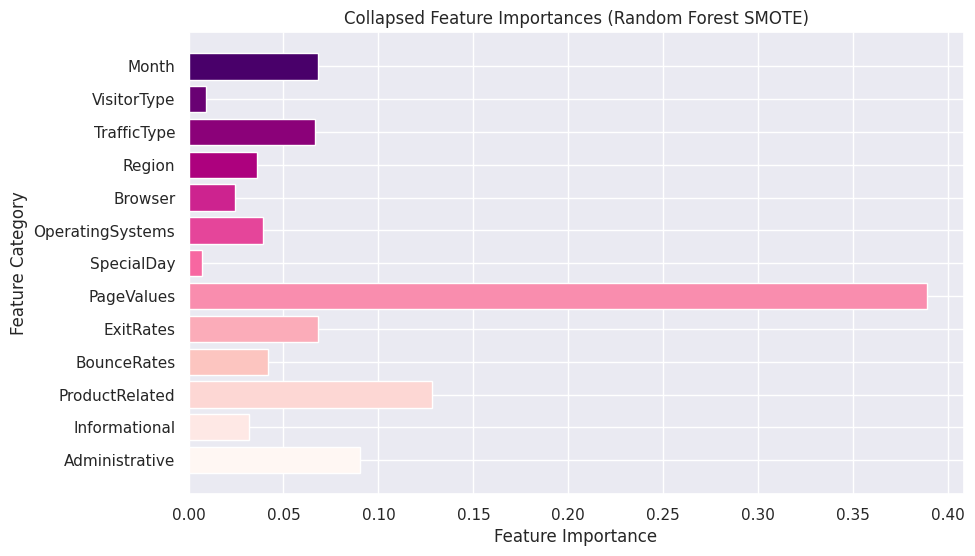

In [331]:
#Asked ChatGPT: Please aggregate the features based on the second word separated by "__" and "_" and using the sum as the value
#Gave it the importances and feature_names as reference

# Retrieve feature importances
importances = pipeline_rfc_smote.named_steps['RandomForestClassifier'].feature_importances_

# Retrieve feature names from previous preprocessing steps
feature_names = pipeline_rfc_smote.named_steps['preprocess'].get_feature_names_out()

# Group feature importances by the second word of the feature names
importance_groups = {}
for importance, feature_name in zip(importances, feature_names):
    second_word = feature_name.split('__', 1)[1].split('_')[0]  # Extract the second word after splitting by '__' and before '_'
    if second_word not in importance_groups:
        importance_groups[second_word] = []
    importance_groups[second_word].append(importance)

# Aggregate importances within each group
collapsed_importances = []
collapsed_feature_names = []
for second_word, importance_values in importance_groups.items():
    collapsed_importance = np.sum(importance_values)  # Aggregate importances by summing
    collapsed_importances.append(collapsed_importance)
    collapsed_feature_names.append(second_word)

# Plot the collapsed feature importances
cmap = plt.get_cmap('RdPu')
plt.figure(figsize=(10, 6))
plt.barh(range(len(collapsed_importances)), collapsed_importances, align='center', color=cmap(np.linspace(0, 1, len(collapsed_importances))))
plt.yticks(np.arange(len(collapsed_importances)), collapsed_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Category')
plt.title('Collapsed Feature Importances (Random Forest SMOTE)')
plt.show()

##Random Forest with Undersampling

In [332]:
#Create a new pipeline for Random Forest Clf
pipeline_rfc_under = Pipeline([
    ('preprocess', preprocessing),
    ('RandomForestClassifier', rfc)
])

#Fit to undersampled data
pipeline_rfc_under.fit(X_train_under,y_train_under)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues',
                                                   'SpecialDay']),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'VisitorType',
                                                   'Month'])])),
                ('RandomForestClassifier',
                 RandomForestClassifier(random_state=42))])

###Model Evaluation (score, auc_score, ROC curve, confusion matrix)

In [333]:
#Regular score
pipeline_rfc_under.score(X_test,y_test)

0.8607731819410651

In [334]:
#AUC score
y_proba_rfc_under = pipeline_rfc_under.predict_proba(X_test)
roc_auc_score(y_test,y_proba_rfc_under[:,1])

0.9249311210056332

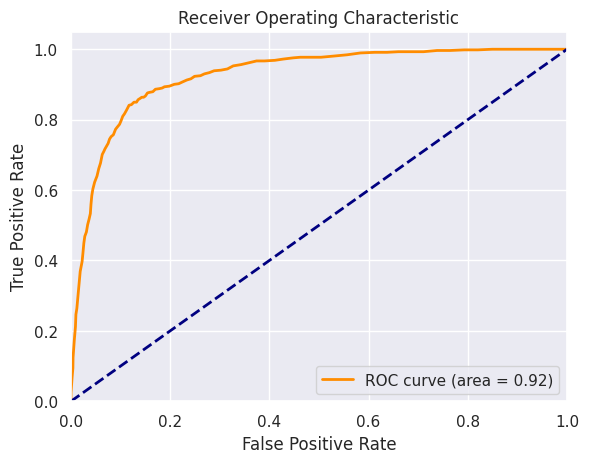

In [335]:
# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rfc_under[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [336]:
#Confusion matrix and classification report
y_pred_rfc_under = pipeline_rfc_under.predict(X_test)
cm_rfc_under = confusion_matrix(y_test, y_pred_rfc_under)
report_rfc_under= classification_report(y_test, y_pred_rfc_under)
print(cm_rfc_under), print(report_rfc_under)

[[2692  435]
 [  80  492]]
              precision    recall  f1-score   support

       False       0.97      0.86      0.91      3127
        True       0.53      0.86      0.66       572

    accuracy                           0.86      3699
   macro avg       0.75      0.86      0.78      3699
weighted avg       0.90      0.86      0.87      3699



(None, None)

Again, this report followed the same pattern that we've seen with undersampling. The precision went down compared to oversampling and the f1 score went down. It also followed the same pattern we saw in decision tree where the percent increase of recall was less than the percent decrease of precision. Thus, the f1 score was lower.

###Feature importance on Random Forest

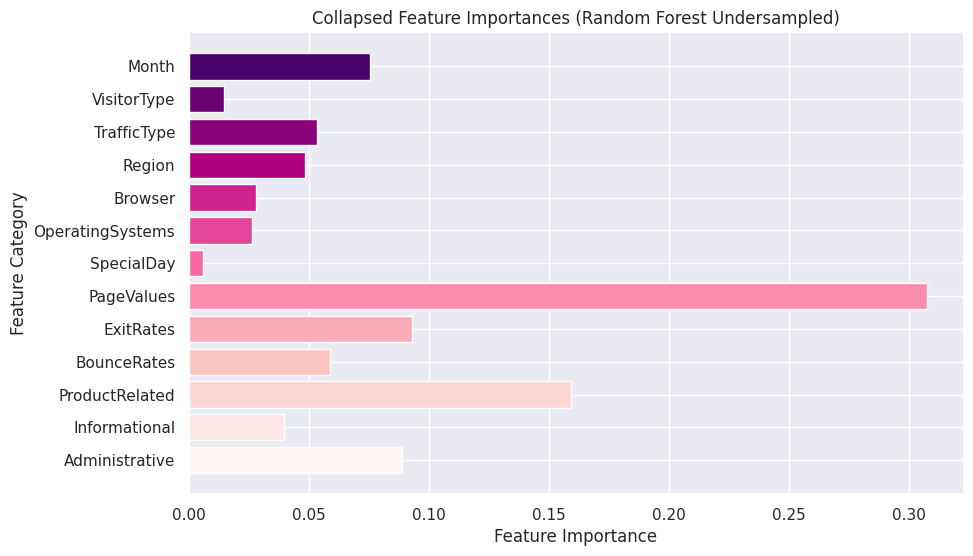

In [337]:
#Asked ChatGPT: Please aggregate the features based on the second word separated by "__" and "_" and using the sum as the value
#Gave it the importances and feature_names as reference

# Retrieve feature importances
importances = pipeline_rfc_under.named_steps['RandomForestClassifier'].feature_importances_

# Retrieve feature names from previous preprocessing steps
feature_names = pipeline_rfc_under.named_steps['preprocess'].get_feature_names_out()

# Group feature importances by the second word of the feature names
importance_groups = {}
for importance, feature_name in zip(importances, feature_names):
    second_word = feature_name.split('__', 1)[1].split('_')[0]  # Extract the second word after splitting by '__' and before '_'
    if second_word not in importance_groups:
        importance_groups[second_word] = []
    importance_groups[second_word].append(importance)

# Aggregate importances within each group
collapsed_importances = []
collapsed_feature_names = []
for second_word, importance_values in importance_groups.items():
    collapsed_importance = np.sum(importance_values)  # Aggregate importances by summing
    collapsed_importances.append(collapsed_importance)
    collapsed_feature_names.append(second_word)

# Plot the collapsed feature importances
cmap = plt.get_cmap('RdPu')
plt.figure(figsize=(10, 6))
plt.barh(range(len(collapsed_importances)), collapsed_importances, align='center', color=cmap(np.linspace(0, 1, len(collapsed_importances))))
plt.yticks(np.arange(len(collapsed_importances)), collapsed_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Category')
plt.title('Collapsed Feature Importances (Random Forest Undersampled)')
plt.show()

#AUTOGLUON

In [338]:
#Train, test, split with "target" in the df
train_data, test_data = train_test_split(df, test_size=0.3, stratify=df["target"])

In [339]:
from autogluon.tabular.configs.hyperparameter_configs import get_hyperparameter_config
#Define hyperparameters
hyperparameters = get_hyperparameter_config('multimodal')

hyperparameters

# %%time
from autogluon.tabular import TabularDataset, TabularPredictor
time_limit = 600  # The results we presented to the class are for time_limit = 3600
metric = 'roc_auc'  # specify your evaluation metric here

predictor = TabularPredictor(label = 'target', eval_metric = metric).fit(train_data, hyperparameters=hyperparameters, time_limit=time_limit, presets='best_quality')

# Best model
print("Best Model: ", predictor.get_model_best())
predictor.leaderboard(test_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20240319_025651"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240319_025651/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 171 seconds for the sub-fit(s) during dynamic stacking.
Time left for full fit of AutoGluon: 429 seconds.
Starting full fit now with num_stack_leve

Best Model:  WeightedEnsemble_L3


,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.938039,0.934134,roc_auc,2.579500,2.050305,320.848185,0.004887,0.002628,2.913018,3,True,10
1,WeightedEnsemble_L2,0.938017,0.934107,roc_auc,1.942519,1.692696,251.634835,0.004139,0.002574,1.287429,2,True,6
2,CatBoost_BAG_L2,0.937695,0.930681,roc_auc,2.403423,2.106540,333.130628,0.048152,0.262877,50.713956,2,True,9
3,XGBoost_BAG_L1,0.937337,0.930890,roc_auc,0.430779,0.245220,30.552881,0.430779,0.245220,30.552881,1,True,4
4,LightGBMXT_BAG_L2,0.936992,0.930505,roc_auc,2.680579,2.274795,316.502110,0.325308,0.431132,34.085438,2,True,8
5,LightGBM_BAG_L1,0.936642,0.928399,roc_auc,0.416891,0.153541,32.069265,0.416891,0.153541,32.069265,1,True,1
6,NeuralNetTorch_BAG_L1,0.934937,0.929409,roc_auc,0.454955,1.057670,97.833961,0.454955,1.057670,97.833961,1,True,5
7,CatBoost_BAG_L1,0.934884,0.930652,roc_auc,0.108226,0.093180,86.075192,0.108226,0.093180,86.075192,1,True,3
8,LightGBMXT_BAG_L1,0.934281,0.929325,roc_auc,0.944420,0.294051,35.885372,0.944420,0.294051,35.885372,1,True,2
9,LightGBM_BAG_L2,0.934102,0.929389,roc_auc,2.574613,2.047678,317.935167,0.219342,0.204015,35.518495,2,True,7


##AutoGluon Discussion

From Autogluon, we decided to find the top 3 results with a 10min runtime and a 1hr runtime. In class, we presented the top three for the 1hr runtime which were:
1. Weighted Ensemble with L2
2. XGBoost Bag with L1
3. LightGBM Bag with L1

The results for the 10min runtime are printed in the cell above, but please feel free to change it to 1hr!

*Discussion:* One thing we noticed was that autogluon could not use over- or undersampled data. We tried to use SMOTENC() and RandomUnderSampler() but it could not use comparison operands and threw an error.  Thus, we are unable to find the true model with the best AUC score as our data is imbalanced. For the following model that we tried, inspired by AutoGluon's top 3 results (1hr runtime), we used the regular X_train and y_train data since that is what AutoGluon is optimized for.

#XGBOOST WITH L1- inspired by AutoGluon's results (1hr runtime 2nd best result)

In [340]:
import xgboost as xgb
#Cell takes about 15 seconds to run

#Create XGBoost model
xgb_model = xgb.XGBClassifier(reg_alpha=1.0, learning_rate = .1)

#Create Bagging Clf, using XGBoost as the base estimator
bagging_xgb_clf = BaggingClassifier(xgb_model, n_estimators=25, random_state=42)

#Put the bagging clf in a pipeline
pipeline_xgboost = Pipeline([
    ('preprocess', preprocessing),
    ('xgboost_bag', bagging_xgb_clf)
])

#Fit the pipeline to X_train, not X_train_smote or X_train_under as AutoGluon was trained on X_train
pipeline_xgboost.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues',
                                                   'SpecialDay']),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Operati...
                                                           importance_type=None,
                                                           interaction_constraints=None,
                                                           learning_rate=0.1,
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=None,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=None, ...),
                                   n_estimators=25, random_state=42))])

###Model Evaluation (score, auc_score, ROC curve, confusion matrix)

In [341]:
#Regular score
pipeline_xgboost.score(X_test,y_test)

0.9080832657474993

In [342]:
#AUC score
y_proba_xgboost= pipeline_xgboost.predict_proba(X_test)
roc_auc_score(y_test, y_proba_xgboost[:,1])

0.935991734520676

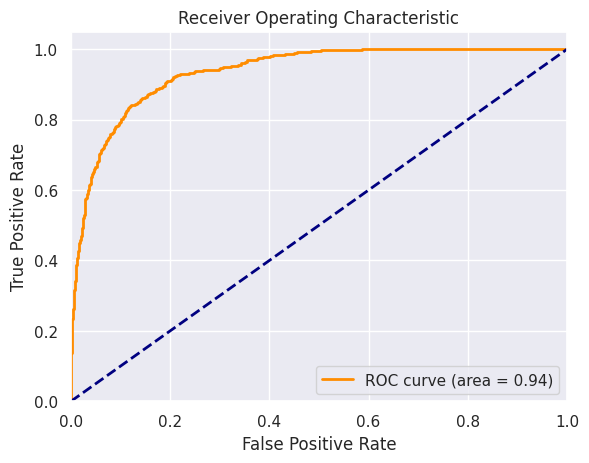

In [343]:
# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgboost[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [344]:
#Confusion matrix and classification report
y_pred_xgboost = pipeline_xgboost.predict(X_test)
cm_xgboost = confusion_matrix(y_test, y_pred_xgboost)
report_xgboost = classification_report(y_test, y_pred_xgboost)
print(cm_xgboost), print(report_xgboost)

[[3022  105]
 [ 235  337]]
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      3127
        True       0.76      0.59      0.66       572

    accuracy                           0.91      3699
   macro avg       0.85      0.78      0.81      3699
weighted avg       0.90      0.91      0.90      3699



(None, None)

This is definitely our best AUC score by far! Looking at its classification report, however, showed that RandomForestClassifier still beats this if we are basing it off of f1 score (more discussion on this at the end).

#MODEL COMPARISON

In [345]:
#All models we evaluated
models = ['Logreg Original', 'Logreg SMOTE', 'Logreg Under', 'Bagging Logreg SMOTE', 'Bagging Logreg Under',
          'Decision Tree SMOTE', 'Decision Tree Under', 'Random Forest SMOTE', 'Random Forest Under',
          'XGBoost_L1']

#AUC scores of those models, respectively
auc_scores = [0.90, 0.87, 0.90, 0.87, 0.90, 0.92, 0.92, 0.92, 0.92, 0.94]
#F1 scores of those models, respectively
f1_scores = [0.49, 0.61, 0.63, 0.60, 0.61, 0.67, 0.65, 0.68, 0.66, 0.66]

Text(0, 0.5, 'Models')

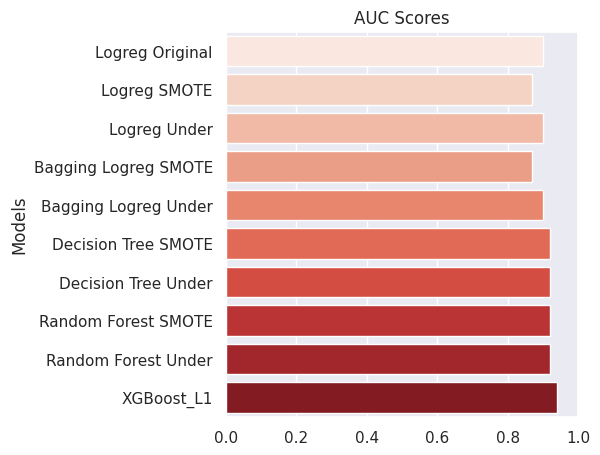

In [346]:
#Plot AUC scores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=auc_scores, y=models, palette='Reds')
plt.xlim(0, 1)
plt.title('AUC Scores')
plt.ylabel('Models')

Text(0, 0.5, 'Models')

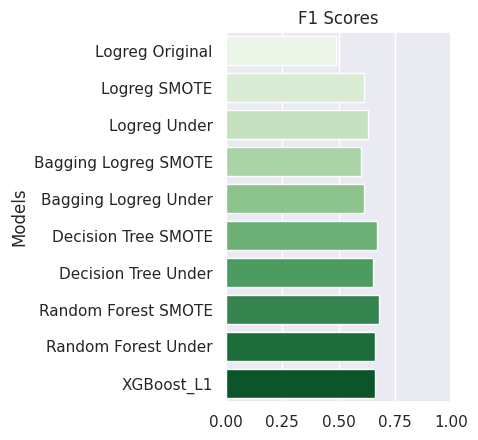

In [347]:
#Plot f1 scores
plt.subplot(1, 2, 2)
sns.barplot(x=f1_scores, y=models, palette='Greens')
plt.xlim(0, 1)  # Limit y-axis to range [0, 1]
plt.title('F1 Scores')
plt.ylabel('Models')

As noted earlier, the XGBoost_L1 model has the highest AUC score, while the Random Forest with oversampled data has the highest f1 score. Models with undersampled data have slightly higher AUC scores than models oversampled data, while the opposite is true for f1 scores.  

#Results & Conclusion

Overall, we noticed three key trends that emerged from our data.

Firstly, we saw the way undersampling and oversampling data could affect the model. With undersampling, we observed multiple times with multiple models that the precision score tends to go down while the recall score goes up, if we are comparing it to the SMOTE model. This makes sense, as undersampling using significantly less majority samples. With a smaller sample pool , the model is more likely to become biased towards the minority class and subsequently, more likely to classify a sample as the minority class. Thus, the recall score goes up as it will more likely predict a true positive class, while precision goes down as it is predicting more positive classes in general (increasing the denominator of the formula).

Secondly, we noticed that the "best model" definition depends on what you wish for your model to do.

First, we compared solely based on AUC scores, which shows the performance of a model against all classification thresholds. This is also where AutoGluon was able to help us identify a model that worked well, as its goal is to maximize the ROC_AUC score (in our case). If we are evaluating a "good model" based on AUC, our top three were:
1. XGBoost_L1
2. Random Forest (oversampled)
3. Random Forest (undersampled)

Secondly, if we want the model to be more accurately predicting the positive classes when it *does* identify a positive class, then we would focus on the highest precision score. If we want the model to be able to pick more of the positive instances out, then we would focus on recall. However, f1 is a good metric that combines both of these models which is what we chose to focus on. Our top 3 models in terms of f1 score are:
1. Random Forest (oversampled)
2. Decision Tree (oversampled)
3. Random Forest (undersampled) / XGBoost_L1  (TIED)

Taking both of these into account, it is safe to say that XGBoost and Random Forest Classifier were our best models. Which of the two is better, however, depends on what you are looking for.


Thirdly, through looking at the feature importance graphs of the RandomForestClassifier with SMOTE, and RandomForestClassifier undersampled, there are clear patters in what each model deems are the most important features  that influence whether or not a visitor on the site makes a purchase.

Across both models, the 'PageValues' and 'Product Related' features has the top two highest values for feature importance, which means that the value of the page in the path to purchase and visiting a product related page type has significant impact on whether a visitor purchases from the site. The high values for 'PageValues' is explained by the fact that the more average value the pages had when the user was visiting, the more likely a customer is to make a purchase. For example, the checkout page would have high importance as it's the page right before a user inputs their payment information to make a purchase, so whether a user gets to this page or not shows digital marketers that a visitor was seriously considering to purchase rather than just browsing the site. For the Product Related feature, it's logical that site visitors click on product related pages on the site to browse through products that they want to purchase before making a purchase. Product related pages tend to have "Buy Now" or "Add to Cart" buttons that guide visitors to the checkout pages, leading visitors to make a purchase.


The next two features we wanted to highlight that were common among both models was 'Exit Rate' and 'Administrative'. 'Exit Rate' was 3rd most important in RandomForestClassifier undersampled and 4th in RandomForestClassifier SMOTE, and 'Administrative' as 4th in RandomForestCLassifier undersampled and 3rd in RandomForestClassifier SMOTE. Exit rates are an important factor to consider as it can indicate areas website owners need to improve and optimize. Moreover, this can pinpoint which pages specifically are causing customers to leave, whereas bouncerate shows if a customer leaves immediately off the landing page. Having a low exit rate is ideal as website owners want visitors to spend more time on the site for more opportunities to convert them into paying customers. As well, owners want to understand what captures visitor's attention and increases engagement. A high exit rate could indicate that the site has irrelevant content, is less engaging, or has technical issues. Therefore, exit rates, whether high or low, are an important indicator of whether visitors intend to make a purchase or not. For Administrative feature there is no specific example of what this type of page consists of, but through external research, we believe that this feature could be user profile page, loyalty page, or a shopping cart page, which demonstrates that a visitor engaged with the website in a deeper way than just browsing the site. Creating a user profile page, signing up for a loyalty program, or adding products to a cart are all part of making a better user experience overall in order to lead visitors to purchase.The more time spent on Administrative pages, the more a visitor has spent with the products. Thus, if a user has high Administrative value, they are more likely they are to purchase a product.

Overall, these 4 features, Page Values, Product Related, Exit Rates and Administrative showcase diffrent aspects that are important indicators of determining whether or not a use purchases. From this specific dataset of visitors, it's clear that pages that involve more opportunities for user engagement lead to increased purchases. If a developer were to look at our dataset, then perhaps they should optimize the 'administrative' and 'product-related' pages, and spend less time on 'informational' pages as that was not as important.

Understanding key website metrics give digital marketers a better understanding of how to improve the site to encourage more online purchases.